# TwoPhase FluidState UserObject #

Tests of the TwoPhase FluidState UserObject

Chris Green, 2015 (chris.green@csiro.au)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## One component ##

In this test, a pressure gradient of 0.1 MPa/m is applied to the 1D mesh (from x = 0 to x = 100). Only one component is modelled.

In [2]:
moosedata1 = pd.read_csv('../../../../../tests/userobjects/FluidState/TwoPhase/gold/twophase1_nodalproperties_0001.csv', header = 0)

In [48]:
moosedata1.dgasdensitydp

0     0.000015
1     0.000015
2     0.000015
3     0.000015
4     0.000015
5     0.000015
6     0.000015
7     0.000015
8     0.000015
9     0.000015
10    0.000015
Name: dgasdensitydp, dtype: float64

Plots of the initial pressure, saturation, and component mass fractions.

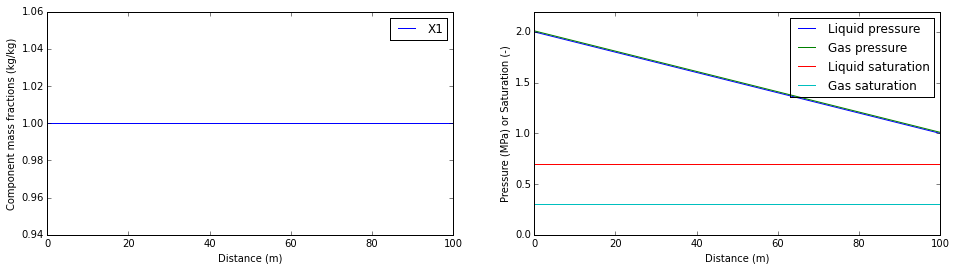

In [9]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of mass fraction component
axes[0].plot(moosedata1.x, moosedata1.x1, label = 'X1')
axes[0].set_ylabel('Component mass fractions (kg/kg)')
axes[0].set_xlabel('Distance (m)')
axes[0].legend(loc = 'upper right')
# Plot of pressure and saturation
axes[1].plot(moosedata1.x, moosedata1.liquid_pressure/1e6, label = 'Liquid pressure')
axes[1].plot(moosedata1.x, moosedata1.gas_pressure/1e6, label = 'Gas pressure')
axes[1].plot(moosedata1.x, moosedata1.liquid_saturation, label = 'Liquid saturation')
axes[1].plot(moosedata1.x, moosedata1.gas_saturation, label = 'Gas saturation')
axes[1].set_ylabel('Pressure (MPa) or Saturation (-)')
axes[1].set_xlabel('Distance (m)')
axes[1].set_ylim([0,2.2])
axes[1].legend()

Plots of the density, viscosity.

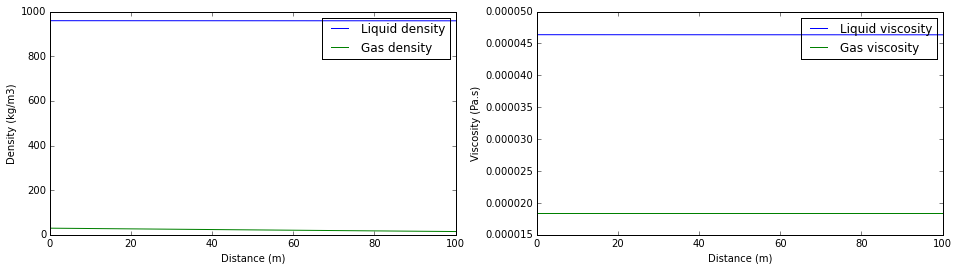

In [14]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of mass fraction components
axes[0].plot(moosedata1.x, moosedata1.liquid_density, label = 'Liquid density')
axes[0].plot(moosedata1.x, moosedata1.gas_density, label = 'Gas density')
axes[0].set_ylabel('Density (kg/m3)')
axes[0].set_xlabel('Distance (m)')
axes[0].legend()
# Plot of pressure and saturation
axes[1].plot(moosedata1.x, moosedata1.liquid_viscosity, label = 'Liquid viscosity')
axes[1].plot(moosedata1.x, moosedata1.gas_viscosity, label = 'Gas viscosity')
axes[1].set_ylabel('Viscosity (Pa.s)')
axes[1].set_xlabel('Distance (m)')
axes[1].legend()

Plots of the derivative of density wrt saturation, pressure, and the two component mass fractions.

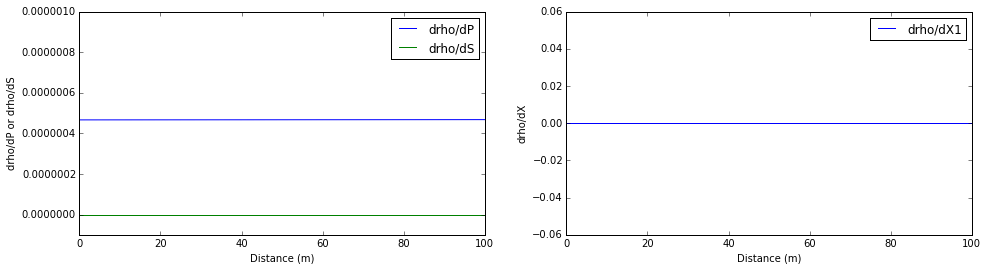

In [15]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of derivative of density wrt pressure and saturation
axes[0].plot(moosedata1.x, moosedata1.dliquiddensitydp, label = 'drho/dP')
axes[0].plot(moosedata1.x, moosedata1.dliquiddensityds, label = 'drho/dS')
axes[0].set_ylabel('drho/dP or drho/dS')
axes[0].set_xlabel('Distance (m)')
axes[0].set_ylim([-1.e-7, 1e-6])
axes[0].legend()
# Plot of derivative of density wrt x1
axes[1].plot(moosedata1.x, moosedata1.dliquiddensitydx1, label = 'drho/dX1')
axes[1].set_ylabel('drho/dX')
axes[1].set_xlabel('Distance (m)')
axes[1].legend()

Test the derivative of density wrt pressure and saturation. To assess the derivatives, we can numerically calculate $\partial \rho / \partial P = \left(\partial \rho / \partial x\right) / \left(\partial P / \partial x\right)$ using the values for $\rho$, and $P$ given by MOOSE.

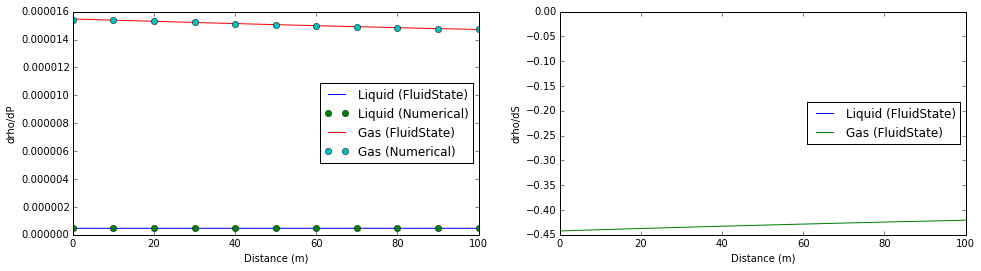

In [51]:
fig, axes = plt.subplots(1,2, figsize = (16,4))

# Plot of derivative of density wrt pressure
axes[0].plot(moosedata1.x, moosedata1.dliquiddensitydp, label = 'Liquid (FluidState)')
axes[0].plot(moosedata1.x,np.gradient(moosedata1.liquid_density, 10)/np.gradient(moosedata1.liquid_pressure, 10), 'o', label = 'Liquid (Numerical)')
axes[0].plot(moosedata1.x, moosedata1.dgasdensitydp, label = 'Gas (FluidState)')
axes[0].plot(moosedata1.x,np.gradient(moosedata1.gas_density, 10)/np.gradient(moosedata1.gas_pressure, 10), 'o', label = 'Gas (Numerical)')
axes[0].set_ylabel('drho/dP')
axes[0].set_xlabel('Distance (m)')
axes[0].legend(loc = 'center right')

# Plot of derivative of density wrt saturation
axes[1].plot(moosedata1.x, moosedata1.dliquiddensityds, label = 'Liquid (FluidState)')
#axes[1].plot(moosedata1.x,np.gradient(moosedata1.liquid_density, 10)/np.gradient(moosedata1.liquid_saturation, 10), 'o', label = 'Liquid (Numerical)')
axes[1].plot(moosedata1.x, moosedata1.dgasdensityds, label = 'Gas (FluidState)')
#axes[1].plot(moosedata1.x,np.gradient(moosedata1.gas_density, 10)/np.gradient(moosedata1.gas_saturation, 10), 'o', label = 'Gas (Numerical)')
axes[1].set_ylabel('drho/dS')
axes[1].set_xlabel('Distance (m)')
axes[1].legend(loc = 'center right')

We can see that the computed derivative given by the SinglePhase FluidState UserObject is correct (note that the numerically calculated derivative using np.gradient is slightly off at the boundaries).

The mobility $\lambda = k_r \rho / \mu$ given by the FluidState UserObject can also be compared to the results calculated using 
the given values for relative permeability, density and viscosity.

(-0.01, 0.01)

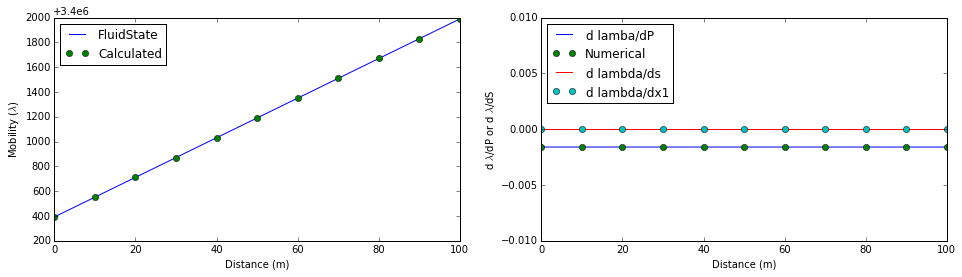

In [10]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of mobility
axes[0].plot(moosedata1.x, moosedata1.mobility, label = 'FluidState')
axes[0].plot(moosedata1.x, moosedata1.relperm * moosedata1.density/moosedata1.viscosity, 'o', label = 'Calculated')
axes[0].set_ylabel('Mobility ($\lambda$)')
axes[0].set_xlabel('Distance (m)')
axes[0].legend(loc = 'upper left')
# Plot of derivative of mobility wrt p and s
axes[1].plot(moosedata1.x, moosedata1.dmobilitydp, label = 'd lamba/dP')
axes[1].plot(moosedata1.x, np.gradient(moosedata1.mobility, 10)/np.gradient(moosedata1.pressure, 10), 'o', label = 'Numerical')
axes[1].plot(moosedata1.x, moosedata1.dmobilityds, label = 'd lambda/ds')
axes[1].plot(moosedata1.x, moosedata1.dmobilitydx1, 'o',label = 'd lambda/dx1')
axes[1].set_ylabel('d $\lambda$/dP or d $\lambda$/dS')
axes[1].set_xlabel('Distance (m)')
axes[1].legend(loc = 'upper left')
axes[1].set_ylim([-0.01,0.01])

Plots of the Relative permeabiltiy and its derivative wrt saturation.

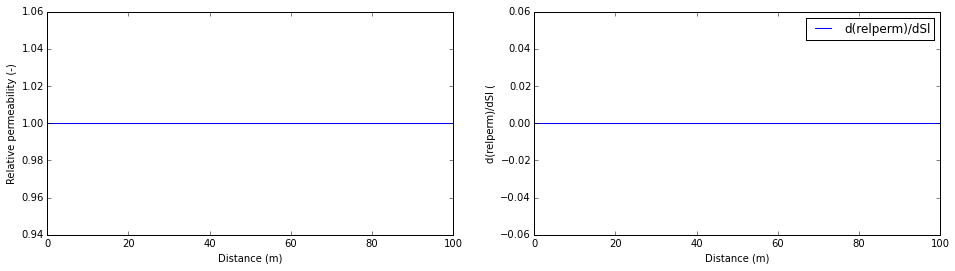

In [11]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of relative permeability
axes[0].plot(moosedata1.x, moosedata1.relperm, label = 'Relative permeability')
axes[0].set_ylabel('Relative permeability (-)')
axes[0].set_xlabel('Distance (m)')
# Plot of derivative of relative permeability
axes[1].plot(moosedata1.x, moosedata1.drelperm, label = 'd(relperm)/dSl')
axes[1].set_ylabel('d(relperm)/dSl (')
axes[1].set_xlabel('Distance (m)')
axes[1].legend()

## Two components ##

In this test, a constant pressure of 1 MPa is applied  to the 1D mesh (from x = 0 to x = 100). Two components are used, and a density increase is applied.

In [12]:
moosedata2 = pd.read_csv('../../../../../tests/userobjects/FluidState/SinglePhase/gold/singlephase2_nodalproperties_0001.csv', header = 0)

Plots of the initial pressure, saturation, and component mass fractions.

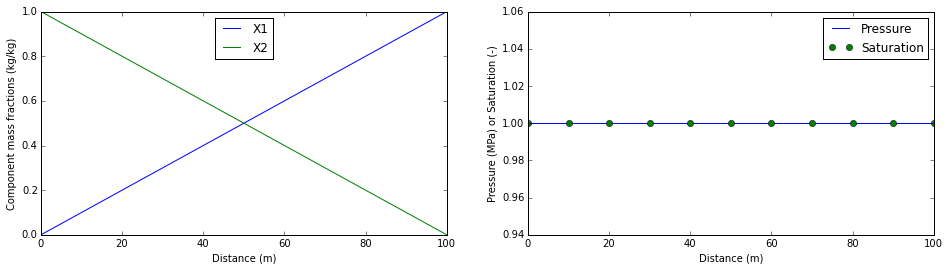

In [13]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of mass fraction components
axes[0].plot(moosedata2.x, moosedata2.x1, label = 'X1')
axes[0].plot(moosedata2.x, moosedata2.x2, label = 'X2')
axes[0].set_ylabel('Component mass fractions (kg/kg)')
axes[0].set_xlabel('Distance (m)')
axes[0].legend(loc = 'upper center')
# Plot of pressure and saturation
axes[1].plot(moosedata2.x, moosedata2.pressure/1e6, label = 'Pressure')
axes[1].plot(moosedata2.x, moosedata2.saturation, 'o', label = 'Saturation')
axes[1].set_ylabel('Pressure (MPa) or Saturation (-)')
axes[1].set_xlabel('Distance (m)')
axes[1].legend()

Plots of the density, viscosity.

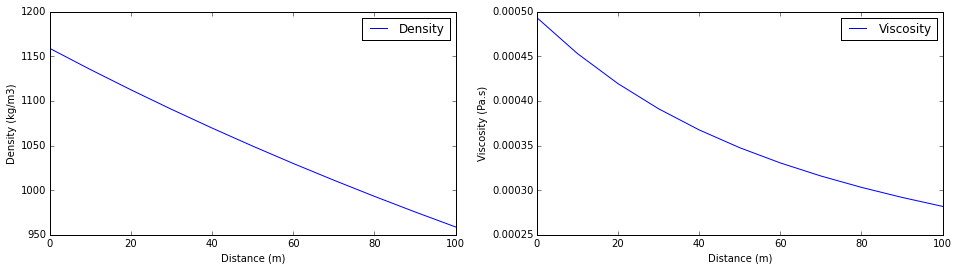

In [14]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of mass fraction components
axes[0].plot(moosedata2.x, moosedata2.density, label = 'Density')
axes[0].set_ylabel('Density (kg/m3)')
axes[0].set_xlabel('Distance (m)')
axes[0].legend()
# Plot of pressure and saturation
axes[1].plot(moosedata2.x, moosedata2.viscosity, label = 'Viscosity')
axes[1].set_ylabel('Viscosity (Pa.s)')
axes[1].set_xlabel('Distance (m)')
axes[1].legend()

Plots of the derivative of density wrt saturation, pressure, and the two component mass fractions.

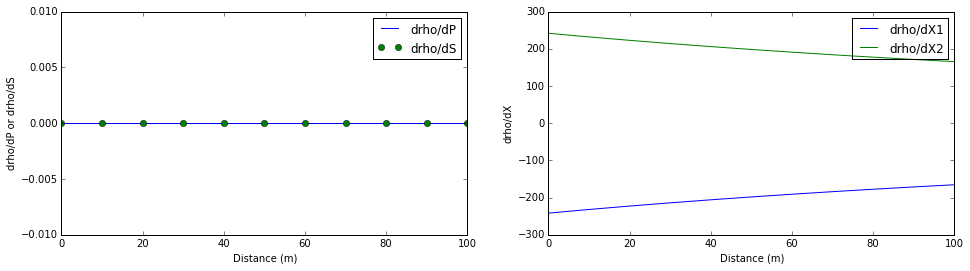

In [15]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of derivative of density wrt pressure and saturation
axes[0].plot(moosedata2.x, moosedata2.ddensitydp, label = 'drho/dP')
axes[0].plot(moosedata2.x, moosedata2.ddensityds, 'o', label = 'drho/dS')
axes[0].set_ylabel('drho/dP or drho/dS')
axes[0].set_xlabel('Distance (m)')
axes[0].set_ylim([-0.01, 0.01])
axes[0].legend()
# Plot of derivative of density wrt x1 and x2
axes[1].plot(moosedata2.x, moosedata2.ddensitydx1, label = 'drho/dX1')
axes[1].plot(moosedata2.x, moosedata2.ddensitydx2, label = 'drho/dX2')
axes[1].set_ylabel('drho/dX')
axes[1].set_xlabel('Distance (m)')
axes[1].legend()

Test the derivative of density wrt mass fractions x1 and x2. To assess the derivatives, we can numerically calculate $\partial \rho / \partial X_{k} = \left(\partial \rho / \partial x\right) / \left(\partial X_k / \partial x\right)$ using the values for $\rho$, $X_1$ and $X_2$ given by MOOSE.

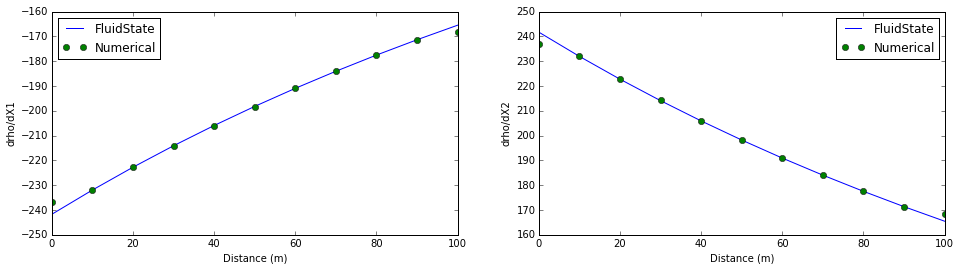

In [16]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of derivative of density wrt x1
axes[0].plot(moosedata2.x, moosedata2.ddensitydx1, label = 'FluidState')
axes[0].plot(moosedata2.x,np.gradient(moosedata2.density, 10)/np.gradient(moosedata2.x1, 10), 'o', label = 'Numerical')
axes[0].set_ylabel('drho/dX1')
axes[0].set_xlabel('Distance (m)')
axes[0].legend(loc = 'upper left')
# Plot of derivative of density wrt x2
axes[1].plot(moosedata2.x, moosedata2.ddensitydx2, label = 'FluidState')
axes[1].plot(moosedata2.x,np.gradient(moosedata2.density, 10)/np.gradient(moosedata2.x2, 10), 'o', label = 'Numerical')
axes[1].set_ylabel('drho/dX2')
axes[1].set_xlabel('Distance (m)')
axes[1].legend()

We can see that the computed derivatives given by the SinglePhase FluidState UserObject are correct (note that the numerically calculated derivatives using np.gradient are slightly off at the boundaries).

The mobility $\lambda = k_r \rho / \mu$ given by the FluidState UserObject can also be compared to the results calculated using 
the given values for relative permeability, density and viscosity.

(-0.004, 0.0015)

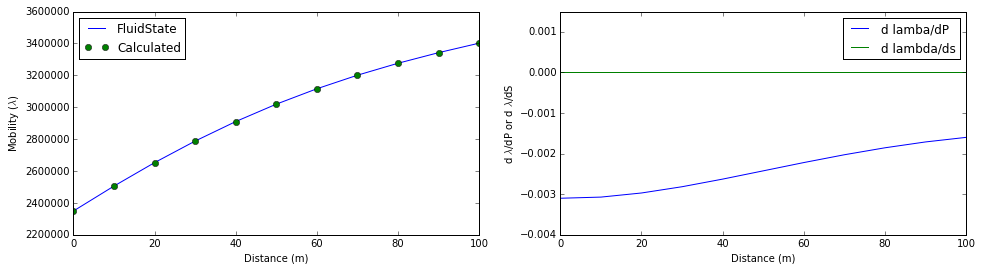

In [17]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of mobility
axes[0].plot(moosedata2.x, moosedata2.mobility, label = 'FluidState')
axes[0].plot(moosedata2.x, moosedata2.relperm * moosedata2.density/moosedata2.viscosity, 'o', label = 'Calculated')
axes[0].set_ylabel('Mobility ($\lambda$)')
axes[0].set_xlabel('Distance (m)')
axes[0].legend(loc = 'upper left')
# Plot of derivative of mobility wrt p and s
axes[1].plot(moosedata2.x, moosedata2.dmobilitydp, label = 'd lamba/dP')
axes[1].plot(moosedata2.x, moosedata2.dmobilityds, label = 'd lambda/ds')
axes[1].set_ylabel('d $\lambda$/dP or d $\lambda$/dS')
axes[1].set_xlabel('Distance (m)')
axes[1].legend(loc = 'upper right')
axes[1].set_ylim([-0.004,0.0015])

Test the derivative of mobility $\lambda$ wrt mass fractions x1 and x2. To assess the derivatives, we can numerically calculate $\partial \lambda / \partial X_{k} = \left(\partial \lambda / \partial x\right) / \left(\partial X_k / \partial x\right)$ using the values for $\lambda$, $X_1$ and $X_2$ given by MOOSE.

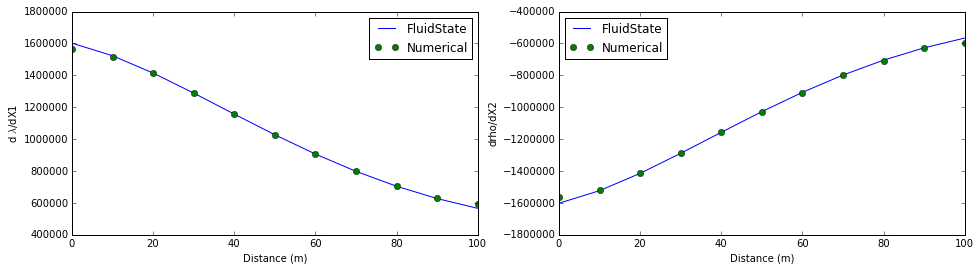

In [18]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of derivative of mobility wrt x1
axes[0].plot(moosedata2.x, moosedata2.dmobilitydx1, label = 'FluidState')
axes[0].plot(moosedata2.x, np.gradient(moosedata2.mobility, 10)/np.gradient(moosedata2.x1, 10), 'o', label = 'Numerical')
axes[0].set_ylabel('d $\lambda$/dX1')
axes[0].set_xlabel('Distance (m)')
axes[0].legend(loc = 'upper right')
# Plot of derivative of mobility wrt x2
axes[1].plot(moosedata2.x, moosedata2.dmobilitydx2, label = 'FluidState')
axes[1].plot(moosedata2.x,np.gradient(moosedata2.mobility, 10)/np.gradient(moosedata2.x2, 10), 'o', label = 'Numerical')
axes[1].set_ylabel('drho/dX2')
axes[1].set_xlabel('Distance (m)')
axes[1].legend(loc = 'upper left')

We can see that the computed derivatives given by the SinglePhase FluidState UserObject are correct (note that the numerically calculated derivatives using np.gradient are slightly off at the boundaries like earlier).

Plots of the Relative permeabiltiy and its derivative wrt saturation.

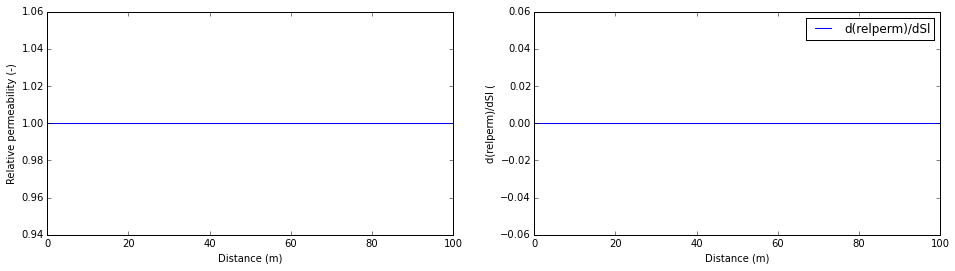

In [19]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of relative permeability
axes[0].plot(moosedata2.x, moosedata2.relperm, label = 'Relative permeability')
axes[0].set_ylabel('Relative permeability (-)')
axes[0].set_xlabel('Distance (m)')
# Plot of derivative of relative permeability
axes[1].plot(moosedata2.x, moosedata2.drelperm, label = 'd(relperm)/dSl')
axes[1].set_ylabel('d(relperm)/dSl (')
axes[1].set_xlabel('Distance (m)')
axes[1].legend()